<a href="https://colab.research.google.com/github/aousaf333/R-PROJECT-/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Loaded:
   age                                       review sentiment
0   18        Amazing movie! The acting was superb.  positive
1   22       It was okay not too bad but not great.   neutral
2   25             Terrible plot and boring scenes.  negative
3   30  Loved it! One of the best movies this year.  positive
4   35        Not my type of movie but it was fine.   neutral

Accuracy: 0.16666666666666666

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.25      0.50      0.33         2
    positive       0.00      0.00      0.00         2

    accuracy                           0.17         6
   macro avg       0.08      0.17      0.11         6
weighted avg       0.08      0.17      0.11         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


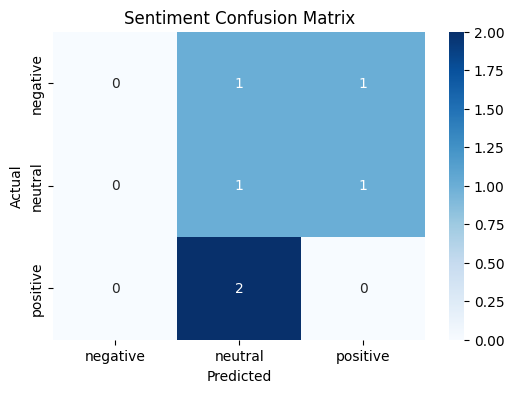


Number of Positive Reviews: 8

Positive Reviews by Age Group:
age_group
<20      2
20–30    3
30–40    1
40–50    2
50+      0
dtype: int64


/tmp/ipython-input-2823068557.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_by_age = df[df.sentiment == "positive"].groupby("age_group").size()


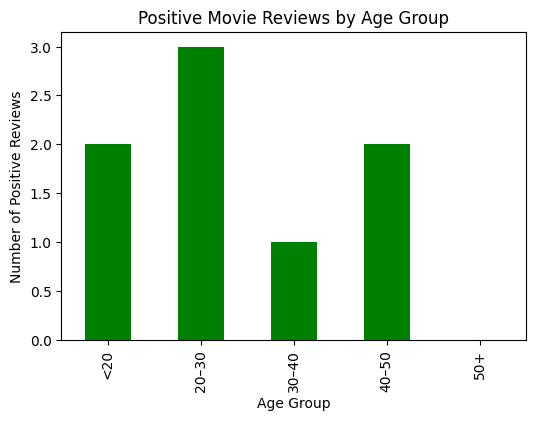

In [6]:
# -----------------------------------------------------------
# SENTIMENT ANALYSIS USING MOVIE_REVIEWS.CSV
# -----------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. LOAD DATASET
# -----------------------------------------------------------
df = pd.read_csv("/content/movie_reviews.csv")
print("\nDataset Loaded:")
print(df.head())

# -----------------------------------------------------------
# 2. SPLIT INTO TRAIN/TEST SETS
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.3, random_state=42
)

# -----------------------------------------------------------
# 3. TEXT VECTORISATION (TF-IDF)
# -----------------------------------------------------------
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# -----------------------------------------------------------
# 4. TRAIN NAIVE BAYES MODEL
# -----------------------------------------------------------
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# -----------------------------------------------------------
# 5. PREDICT ON TEST SET
# -----------------------------------------------------------
y_pred = model.predict(X_test_vec)

# -----------------------------------------------------------
# 6. ACCURACY AND REPORT
# -----------------------------------------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------------------------
# 7. CONFUSION MATRIX GRAPH
# -----------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Sentiment Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------------
# 8. COUNT POSITIVE REVIEWS
# -----------------------------------------------------------
positive_count = df[df.sentiment == "positive"].shape[0]
print("\nNumber of Positive Reviews:", positive_count)

# -----------------------------------------------------------
# 9. POSITIVE REVIEWS BY AGE GROUP + GRAPH
# -----------------------------------------------------------
df["age_group"] = pd.cut(
    df["age"],
    bins=[0,20,30,40,50,100],
    labels=["<20","20–30","30–40","40–50","50+"]
)

positive_by_age = df[df.sentiment == "positive"].groupby("age_group").size()
print("\nPositive Reviews by Age Group:")
print(positive_by_age)

# BAR CHART
plt.figure(figsize=(6,4))
positive_by_age.plot(kind="bar", color="green")
plt.title("Positive Movie Reviews by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Positive Reviews")
plt.show()
